# RNA-Puzzle 20 - Twister sister ribozyme

In [37]:
import nglview
from rna_tools.Seq import RNASequence
from rna_tools.BlastPDB import BlastPDB
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
seq = RNASequence("ACCCGCAAGGCCGACGGCGCCGCCGCUGGUGCAAGUCCAGCCACGCUUCGGCGUGGGCGCUCAUGGGU")

In [9]:
seq

ACCCGCAAGGCCGACGGCGCCGCCGCUGGUGCAAGUCCAGCCACGCUUCGGCGUGGGCGCUCAUGGGU

# Secondary structure prediction

In [10]:
print seq.predict_ss()

>rna_seq
ACCCGCAAGGCCGACGGCGCCGCCGCUGGUGCAAGUCCAGCCACGCUUCGGCGUGGGCGCUCAUGGGU
(((((..(((((.(((.((..((.(((((.......)))))...))..)).))).))).))..))))) (-32.50)


In [11]:
print seq.predict_ss(method='RNAsubopt')

>rna_seq [100]
ACCCGCAAGGCCGACGGCGCCGCCGCUGGUGCAAGUCCAGCCACGCUUCGGCGUGGGCGCUCAUGGGU -32.50   1.00
(((((..(((((.(((.((..((.(((((.......)))))...))..)).))).))).))..))))) -32.50
.((((..(((((.(((.((..((.(((((.......)))))...))..)).))).))).))..)))). -31.90



In [12]:
print seq.predict_ss(method='ipknot', verbose=True)

ACCCGCAAGGCCGACGGCGCCGCCGCUGGUGCAAGUCCAGCCACGCUUCGGCGUGGGCGCUCAUGGGU
..((....))(((..((((((...(((((.......)))))(((((....)))))))))))..)))..



In [13]:
print seq.predict_ss(method='contextfold')

(((((..........((((((...(((((.......)))))(((((....)))))))))))..)))))




# Search Rfam

In [58]:
import rna_tools.RfamSearch as RfamSearch
rs = RfamSearch.RfamSearch()
print rs.cmscan(seq)

('RFAM_DB_PATH', '/home/magnus/work/db/rfam/Rfam.cm')
cmscan -E 1 /home/magnus/work/db/rfam/Rfam.cm /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmpCfvTrK.fa  > /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmphHDnj0
# cmscan :: search sequence(s) against a CM database
# INFERNAL 1.1.2 (July 2016)
# Copyright (C) 2016 Howard Hughes Medical Institute.
# Freely distributed under a BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query sequence file:                   /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmpCfvTrK.fa
# target CM database:                    /home/magnus/work/db/rfam/Rfam.cm
# sequence reporting threshold:          E-value <= 1
# number of worker threads:              4
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       target  [L=50]
Hit scores:
 rank     E-value  score  bias  modelname       start    end   mdl trunc   gc  description
 ----   --------- ------ ----- 

In [60]:
import rna_tools.tools.rna_alignment.rna_alignment as ra
a = ra.RNAalignment(fetch="RF02681")# '/Users/magnus/work/sister_twister/RAGATH-3-twister-sister.sto')
a

SingleLetterAlphabet() alignment with 4 rows and 85 columns
GCAACCCGCAAGGCCGACGCACAAC---GCGCCGCCGGUGCAAG...ACA ADJS01013948.1/250-330
GAAACCCGCUAGGCCGACAGCCUCACCGCUGCCGCUGGUGCAAG...CAG BABG01005008.1/780-696
ACGACCCGCAAGGCCGACGCAUAAC---GCGCCGCCGGUGCAAG...ACA ADJS01013948.1/577-657
AUGACCCGCAAGGCCGACGGCAUCCCG-CCGCCGCUGGUGCAAG...ACA FP929046.1/2708602-2708521

Rchie: plot saved to rchie.png


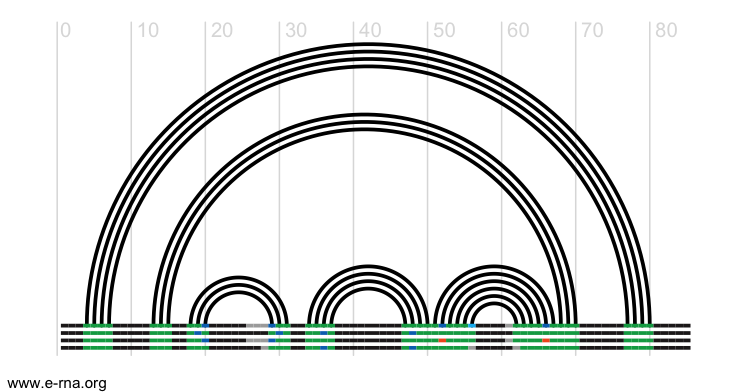

In [61]:
#print a.io.format("fasta")
ra.RChie().plot_cov(a.io.format("fasta"), a.ss_cons_std, verbose=False)

In [63]:
a.find_seq("UGCAAGUC")

SeqRecord(seq=Seq('AUGACCCGCAAGGCCGACGGCAUCCCG-CCGCCGCUGGUGCAAGCCCAGCCGCC...ACA', SingleLetterAlphabet()), id='FP929046.1/2708602-2708521', name='FP929046.1', description='FP929046.1/2708602-2708521', dbxrefs=[])

In [64]:
seq = RNASequence("GCCGCCGCUGGUGCAAGUCCAGCCACGCUUCGGCGUGGGCGCUCAUGGGU")
print rs.cmscan(seq)

('RFAM_DB_PATH', '/home/magnus/work/db/rfam/Rfam.cm')
cmscan -E 1 /home/magnus/work/db/rfam/Rfam.cm /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmp4qzzKI.fa  > /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmpm7wPJ8
# cmscan :: search sequence(s) against a CM database
# INFERNAL 1.1.2 (July 2016)
# Copyright (C) 2016 Howard Hughes Medical Institute.
# Freely distributed under a BSD open source license.
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
# query sequence file:                   /var/folders/yc/ssr9692s5fzf7k165grnhpk80000gp/T/tmp4qzzKI.fa
# target CM database:                    /home/magnus/work/db/rfam/Rfam.cm
# sequence reporting threshold:          E-value <= 1
# number of worker threads:              4
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

Query:       target  [L=50]
Hit scores:
 rank     E-value  score  bias  modelname       start    end   mdl trunc   gc  description
 ----   --------- ------ ----- 

# PDB Blast search

In [65]:
p = BlastPDB(seq.seq)
p.search()
print p.result

<HTML>
<TITLE>BLAST Search Results</TITLE>
<BODY BGCOLOR="#FFFFFF" LINK="#0000FF" VLINK="#660099" ALINK="#660099">
<PRE>
<b>BLASTN 2.2.18 [Mar-02-2008]</b>


<b><a href="http://www.ncbi.nlm.nih.gov/entrez/query.fcgi?db=PubMed&cmd=Retrieve&list_uids
=9254694&dopt=Citation">Reference</a>:</b>
Altschul, Stephen F., Thomas L. Madden, Alejandro A. Sch&auml;ffer, 
Jinghui Zhang, Zheng Zhang, Webb Miller, and David J. Lipman (1997), 
"Gapped BLAST and PSI-BLAST: a new generation of protein database search
programs",  Nucleic Acids Res. 25:3389-3402.

<b>Query=</b> UNKNOWN_SEQUENCE
         (50 letters)

<b>Database:</b> pdb_nucleotide 
           20,601 sequences; 4,025,796 total letters

Searching..................................................done

<PRE>


                                                                 Score    E
Sequences producing significant alignments:                      (bits) Value

5Y87:2:B,D|pdbid|entity|chain(s)|sequence                             <a href = #